In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [2]:
import zipfile

# Unzip the dataset
with zipfile.ZipFile('/content/waze_dataset.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset_directory')

In [3]:
df=pd.read_csv('/content/dataset_directory/waze_dataset.csv')

In [4]:
df

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android
14996,14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone


In [5]:
df.shape

(14999, 13)

In [6]:
df.drop('ID', axis=1, inplace=True)

In [30]:
df['label'].value_counts(normalize=True)*100


,proportion
label,
retained,82.264494
churned,17.735506


In [29]:
label_counts = df['label'].value_counts(dropna=False)
print(label_counts)

label
retained    11763
churned      2536
Name: count, dtype: int64


In [8]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [9]:
# Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# Convert infinite values to zero
df.loc[df['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0

# Descriptive Statistic
df['km_per_driving_day'].describe()

,km_per_driving_day
count,14999.000000
mean,578.963113
std,1030.094384
min,0.000000
25%,136.238895
50%,272.889272
75%,558.686918
max,15420.234110


In [10]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives']>=60) & (df['driving_days']>= 15), 1, 0)

df[['drives', 'driving_days', 'professional_driver']].head()

,drives,driving_days,professional_driver
0,226,19,1
1,107,11,0
2,95,8,0
3,40,3,0
4,68,18,1


In [11]:
# Check count of professionals and non-professionals
print(df['professional_driver'].value_counts())

# Check in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True) * 100

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    80.120227
                     churned     19.879773
1                    retained    92.443730
                     churned      7.556270
Name: proportion, dtype: float64

In [12]:
# Check info()
df.info()

# Drop rows with missing data in `label` column
df = df.dropna(subset=['label'], axis=0)

print()
# Data dimension
print('Data Dimension after removing missing value:', df.shape)
print()

# Check if there any missing data
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int64  
dtypes: float64(4), int64(8

In [13]:
# Impute Outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2','driven_km_drives', 'duration_minutes_drives', 'km_per_driving_day']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column]>threshold, column] = threshold

In [14]:
df.dropna()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver
0,retained,243,200,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,1
1,retained,133,107,326.896596,1225,19,64,8898.716275,3160.472914,13,11,iPhone,1246.901868,0
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone,170.029229,0
14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android,203.128760,0
14996,retained,243,200,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone,182.225002,1
14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone,675.293092,0


In [15]:
print(df.isnull().sum().sum())

0


In [16]:
df.describe()


,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,484.488544,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,570.872328,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,2258.494484,1.000000


In [17]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

<ipython-input-17-dde483934d96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label2'] = np.where(df['label']=='churned', 1, 0)


,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


In [18]:
# Create new `device2` variable
df['device2'] = np.where(df['device']=='Android', 0, 1)
df[['device', 'device2']].tail()

<ipython-input-18-3c07782c93a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['device2'] = np.where(df['device']=='Android', 0, 1)


,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


In [19]:
# Generate a correlation matrix
df.corr(method='pearson', numeric_only=True)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2,device2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.007664,0.443654,0.034911,0.012704
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.007190,0.444425,0.035865,0.011684
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.008282,0.254433,0.024568,0.012138
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.010837,0.003770,-0.129263,-0.011299
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.001297,-0.000224,0.052322,-0.001316
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,-0.003103,0.007126,0.015032,-0.000275
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.409997,-0.000904,0.019767,-0.002091
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.287070,-0.012128,0.040407,-0.007709
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.489336,0.453825,-0.303851,-0.010221
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.503812,0.469776,-0.294259,-0.003859


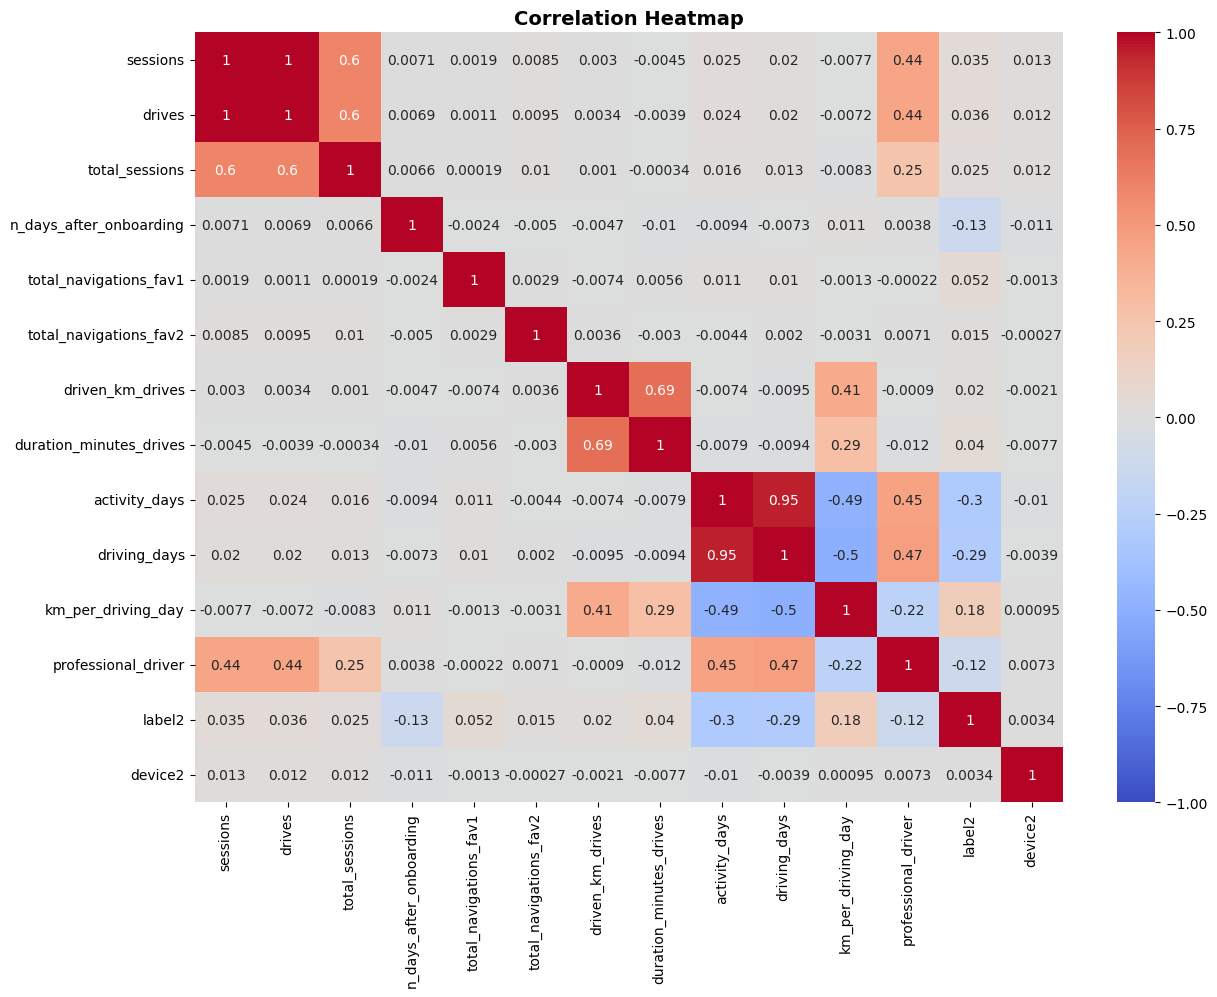

In [20]:

# Plot correlation heatmap
import seaborn as sns
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(method='pearson', numeric_only=True),
            vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=14, weight='bold');

In [32]:
# prompt: drop drives and device
df = df.drop(['drives'], axis=1)
df = df.drop(['driving_days'], axis=1)
df = df.drop(['driven_km_drives'], axis=1)

In [45]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pandas as pd # Import pandas

X = df.drop('label2', axis=1)
y = df['label2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array

# Fit the encoder on the training data and transform both training and testing data
X_train_encoded = encoder.fit_transform(X_train[['device']]) # Apply to 'device' column
X_test_encoded = encoder.transform(X_test[['device']])

# Get feature names from the encoder
feature_names = encoder.get_feature_names_out(['device'])

# Create DataFrames from the encoded data
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test.index)

# Drop the original 'device' column and concatenate the encoded columns
X_train = X_train.drop('device', axis=1)
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = X_test.drop('device', axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

# Drop the 'label' column before scaling
X_train = X_train.drop('label', axis=1) # Drop 'label' column from X_train
X_test = X_test.drop('label', axis=1)   # Drop 'label' column from X_test


# Now apply MinMaxScaler
StandardScaler = MinMaxScaler() # It's actually MinMaxScaler
X_train = StandardScaler.fit_transform(X_train)
X_test = StandardScaler.transform(X_test)

In [23]:
# Apply SMOTE
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE # Import SMOTE class from imblearn.over_sampling
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=['number']).columns
df_numerical = df[numerical_features]

# Apply MinMaxScaler to the numerical features
scaler_minmax = MinMaxScaler()
scaled_data_minmax = scaler_minmax.fit_transform(df_numerical)

# Create a new DataFrame with scaled numerical features
df_scaled = pd.DataFrame(scaled_data_minmax, columns=numerical_features, index=df.index)

# Concatenate scaled numerical features with original non-numerical features
df_final = pd.concat([df.drop(columns=numerical_features), df_scaled], axis=1)

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

print("\nTraining and Evaluating XGBoost Model...")
xgb_model = XGBClassifier(random_state=42, class_weight='balanced',learning_rate=0.1, max_depth=9, n_estimators=150)
xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Training and Evaluating XGBoost Model...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:50:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8137062937062937
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2941
           1       0.43      0.16      0.23       634

    accuracy                           0.81      3575
   macro avg       0.64      0.56      0.56      3575
weighted avg       0.77      0.81      0.78      3575



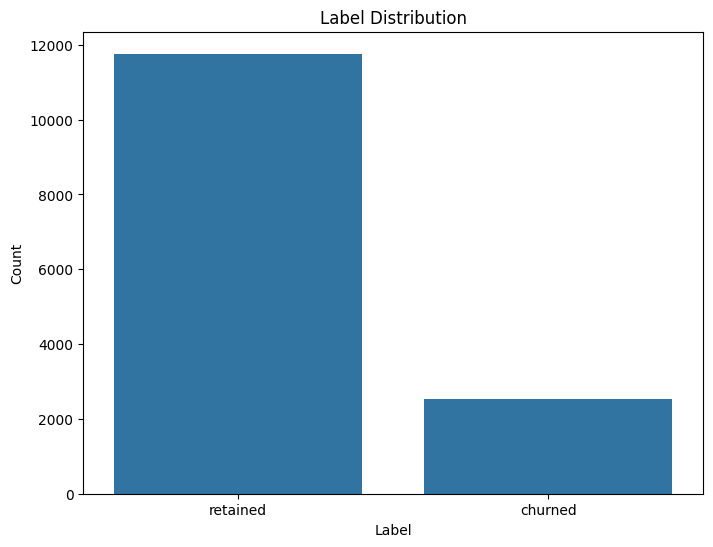

label
retained    11763
churned      2536
Name: count, dtype: int64


In [35]:
# prompt: visualize the imbalance of the data

import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Create a bar plot to visualize the label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Print the label counts for a more precise understanding
print(label_counts)

In [43]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


In [47]:
import numpy as np
from imblearn.combine import SMOTEENN
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Apply SMOTE to the training data
smote_enn = SMOTEENN(random_state=42)
X_train_smote, y_train_smote = smote_enn.fit_resample(X_train, y_train)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on the original y_train (before SMOTE)
label_encoder.fit(y_train) # Fit on original y_train with string labels

# Transform the target variables using the fitted LabelEncoder
y_train_smote = label_encoder.transform(y_train_smote)
y_train = label_encoder.transform(y_train) # Ensure y_train is also transformed for class_weight calculation
y_test_encoded = label_encoder.transform(y_test) # Transform y_test using the fitted encoder


# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights)) # Convert to dictionary

model = XGBClassifier(random_state=42,class_weight='balanced')

# Train the model with SMOTE-resampled data and class weights
model.fit(X_train_smote, y_train_smote , sample_weight=[class_weights[label] for label in y_train_smote])

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using the encoded y_test
accuracy = accuracy_score(y_test_encoded, y_pred)  # Use y_test_encoded here
print("Accuracy with SMOTE:", accuracy)
print(classification_report(y_test_encoded, y_pred)) # Use y_test_encoded here as well

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:09:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy with SMOTE: 0.5986013986013986
              precision    recall  f1-score   support

           0       0.90      0.57      0.70      2337
           1       0.28      0.73      0.40       523

    accuracy                           0.60      2860
   macro avg       0.59      0.65      0.55      2860
weighted avg       0.79      0.60      0.64      2860



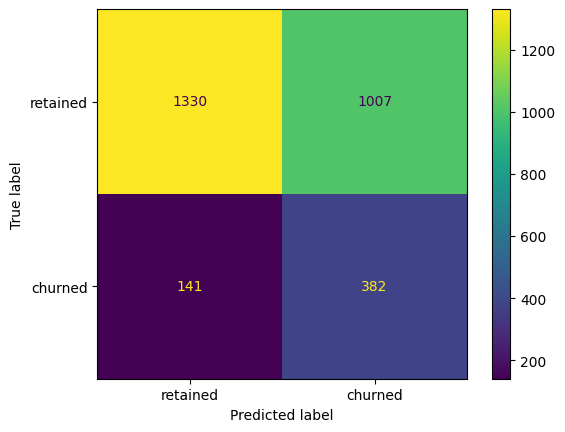

In [49]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['retained', 'churned'])
disp.plot();